<a href="https://colab.research.google.com/github/mingyukim-ai/AIMC2023/blob/main/cyclegan_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

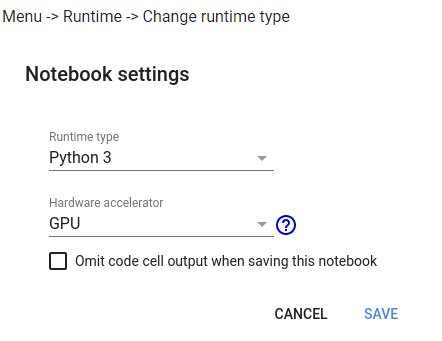

In [ ]:
#할당된 gpu 확인
!nvidia-smi

# 런타임 유형을 GPU로 설정하지 않으면 아래 문구가 뜸
#NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Fri Jan  6 13:14:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#현재 경로에 있는 파일이 무엇이 있는지 확인해보기(아래 코드를 받고 난 후와 비교)
!ls

sample_data


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2508, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2508 (delta 0), reused 1 (delta 0), pack-reused 2507
Receiving objects: 100% (2508/2508), 8.19 MiB | 24.75 MiB/s, done.
Resolving deltas: 100% (1573/1573), done.


In [ ]:
#가져온 코드 확인하기
!ls

pytorch-CycleGAN-and-pix2pix  sample_data


In [ ]:
#작업 위치를 코드 아래와 옮기기
import os
os.chdir('./pytorch-CycleGAN-and-pix2pix/')

In [ ]:
#코드 폴더 내용 확인하기
!ls

CycleGAN.ipynb	docs		 LICENSE  pix2pix.ipynb     scripts   util
data		environment.yml  models   README.md	    test.py
datasets	imgs		 options  requirements.txt  train.py


In [ ]:
#필요한 패키지 설치하기
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.1 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417107 sha256=23d7f5e808729ba9894ab79790e9f974800abb46bdee8ff863e2858f9e75360a
  Stored in directory: /root/.cache/pip/wheels/4d/73/32/0bbe55d2dccb9d80d3f020f474c15a5a1eef232817dcebe776

In [ ]:
#핸즈온에 필요한 데이터 가져오기(데이터 권한: 프로메디우스(주)의 데이터이며, 본 핸즈온용으로 무료 배포)
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=186ygfUM9eb1UuWbtKmSSP3BmuoExqWOY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=186ygfUM9eb1UuWbtKmSSP3BmuoExqWOY" -O handson_cyclegan.zip && rm -rf ~/cookies.txt

--2023-01-06 13:15:09--  https://docs.google.com/uc?export=download&confirm=t&id=186ygfUM9eb1UuWbtKmSSP3BmuoExqWOY
Resolving docs.google.com (docs.google.com)... 108.177.12.102, 108.177.12.113, 108.177.12.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tp51565klllruf6rttkt3ks7jcjdo1eo/1673010900000/03948272884470799285/*/186ygfUM9eb1UuWbtKmSSP3BmuoExqWOY?e=download&uuid=4466f3c7-49db-4382-aaa4-e24be44fba2f [following]
--2023-01-06 13:15:09--  https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tp51565klllruf6rttkt3ks7jcjdo1eo/1673010900000/03948272884470799285/*/186ygfUM9eb1UuWbtKmSSP3BmuoExqWOY?e=download&uuid=4466f3c7-49db-4382-aaa4-e24be44fba2f
Resolving doc-04-2o-docs.googleusercontent.com (doc-04-2o-docs.googleusercontent.com)... 74.125.196.132, 

In [ ]:
#받은 데이터 확인하기
!ls

CycleGAN.ipynb	environment.yml       models	     requirements.txt  util
data		handson_cyclegan.zip  options	     scripts
datasets	imgs		      pix2pix.ipynb  test.py
docs		LICENSE		      README.md      train.py


In [ ]:
#데이터 압축풀기(총 1100장의 256x256 pixel 해상도의 흉부 X-ray이미지이며 인공지능 생성모델로 만든 합성이미지임)
!unzip handson_cyclegan.zip

Archive:  handson_cyclegan.zip
   creating: handson_cyclegan/
   creating: handson_cyclegan/promedius_cxr_for_cyclegan/
   creating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000002.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000011.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000031.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000048.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000058.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000060.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000068.png  
  inflating: handson_cyclegan/promedius_cxr_for_cyclegan/testA/promedius_synthesized_cxr_000076.png  


In [ ]:
#압축이 잘 풀렸는지 확인
!ls

CycleGAN.ipynb	environment.yml       LICENSE	     README.md	       train.py
data		handson_cyclegan      models	     requirements.txt  util
datasets	handson_cyclegan.zip  options	     scripts
docs		imgs		      pix2pix.ipynb  test.py


In [ ]:
folderlist=os.listdir('handson_cyclegan/promedius_cxr_for_cyclegan')#이미지 파일명을 imglist라는 변수에 담기
print(folderlist)#폴더 내용 확인

['trainB', 'trainA', 'testB', 'testA']


In [ ]:
testA_imglist=os.listdir(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testA'))#trainA 의 이미지 파일명 리스트 변수에 저장
testB_imglist=os.listdir(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testB'))#trainB 의 이미지 파일명 리스트 변수에 저장

In [ ]:
print('testA의 이미지 리스트 5개 출력')
print(testA_imglist[:5])

print('testB의 이미지 리스트 5개 출력')
print(testB_imglist[:5])

testA의 이미지 리스트 5개 출력
['promedius_synthesized_cxr_001481.png', 'promedius_synthesized_cxr_000741.png', 'promedius_synthesized_cxr_001430.png', 'promedius_synthesized_cxr_001844.png', 'promedius_synthesized_cxr_000060.png']
testB의 이미지 리스트 5개 출력
['promedius_synthesized_cxr_001481.png', 'promedius_synthesized_cxr_000741.png', 'promedius_synthesized_cxr_001430.png', 'promedius_synthesized_cxr_001844.png', 'promedius_synthesized_cxr_000060.png']


In [ ]:
import cv2
import matplotlib.pyplot as plt

for tmp in range(5):
  testA_img=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testA', testA_imglist[tmp]), 0)
  testB_img=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan', 'testB', testA_imglist[tmp]), 0)#파일명을 A와 같이 해서 비교.
  plt.figure(figsize=(10,10))
  plt.subplot(121)
  plt.title('noised image(salt and pepper)', fontsize=15)
  plt.imshow(testA_img, cmap='gray')
  plt.subplot(122)
  plt.title('original cleaned image', fontsize=15)
  plt.imshow(testB_img, cmap='gray')
  plt.show()

In [ ]:
!python train.py --display_id 0 --dataroot handson_cyclegan/promedius_cxr_for_cyclegan --name promedius_cxr_for_cyclegan --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: handson_cyclegan/promedius_cxr_for_cyclegan	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest             

###학습이 진행되면 아래와 같이 로그가 남음

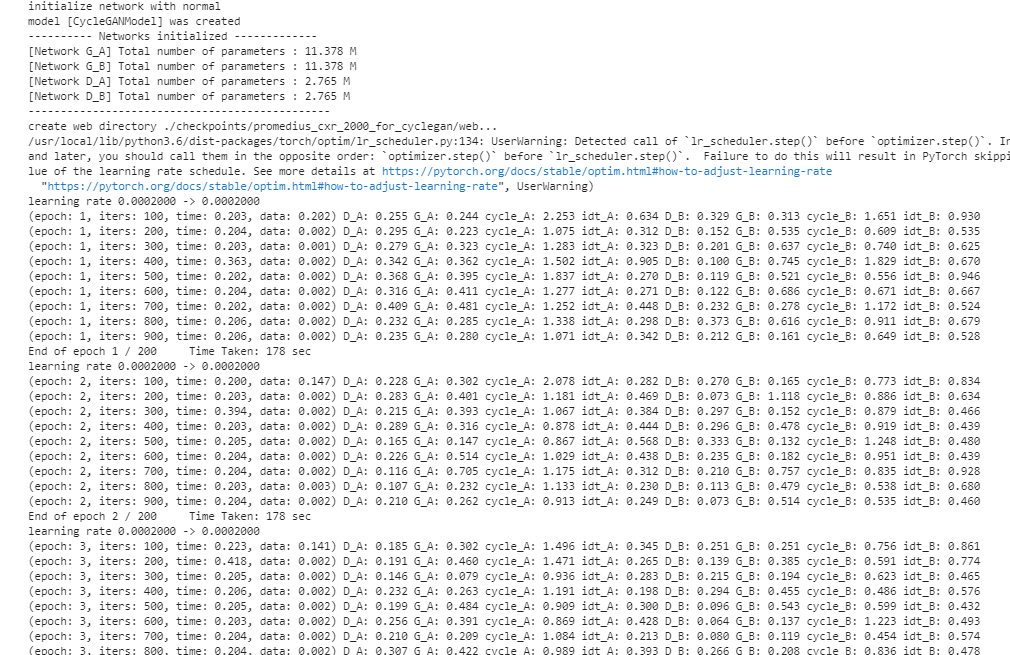

In [ ]:
import shutil
os.makedirs('handson_cyclegan/weights/promedius_cxr_for_cyclegan')
shutil.copy(os.path.join('handson_cyclegan/weights/latest_net_G.pth'), 'handson_cyclegan/weights/promedius_cxr_for_cyclegan')
!python test.py --dataroot handson_cyclegan/promedius_cxr_for_cyclegan/testA --name promedius_cxr_for_cyclegan --model test --checkpoints_dir 'handson_cyclegan/weights' --results_dir 'results'  --no_dropout --num_test 200

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: handson_cyclegan/weights      	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: handson_cyclegan/promedius_cxr_for_cyclegan/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
            

In [ ]:
#이미지 비교 metric 함수(mean squared error와 structural similarity index)
from skimage.metrics import structural_similarity as ssim

def mse(imageA, imageB):
    
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err
def compare_images(imageA, imageB):
    
    mse_value = mse(imageA, imageB)
    ssim_value = ssim(imageA, imageB)
    
    return mse_value, ssim_value

In [ ]:
os.listdir('results/promedius_cxr_for_cyclegan/test_latest')

['index.html', 'images']

In [ ]:
#테스트 이미지에 대해 MSE와 SSIM구하기
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

real_images=glob.glob(os.path.join('results/promedius_cxr_for_cyclegan/test_latest/images', '*_real.png'))

mse_arr=[]
ssim_arr=[]
for tmp in range(len(real_images)):
    
    img_real=cv2.imread(real_images[tmp], 0)
    img_syn=cv2.imread(real_images[tmp].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[tmp].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    mse_arr.append(mse_v)
    ssim_arr.append(ssim_v)
    
    plt.figure(figsize=(15,10))
    plt.subplot(131)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(132)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(133)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.show()

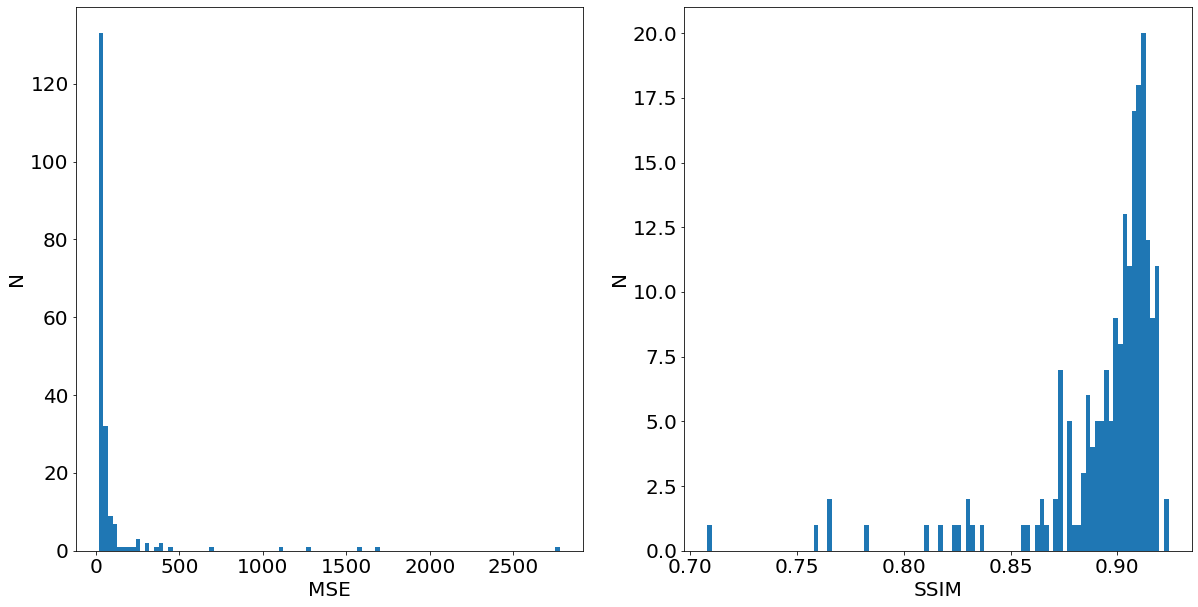

In [ ]:
#이미지 비교 metric MSE와 SSIM히스토그램 그려보기
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(mse_arr, bins=100)
plt.xlabel('MSE', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.subplot(122)
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.hist(ssim_arr, bins=100)     
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

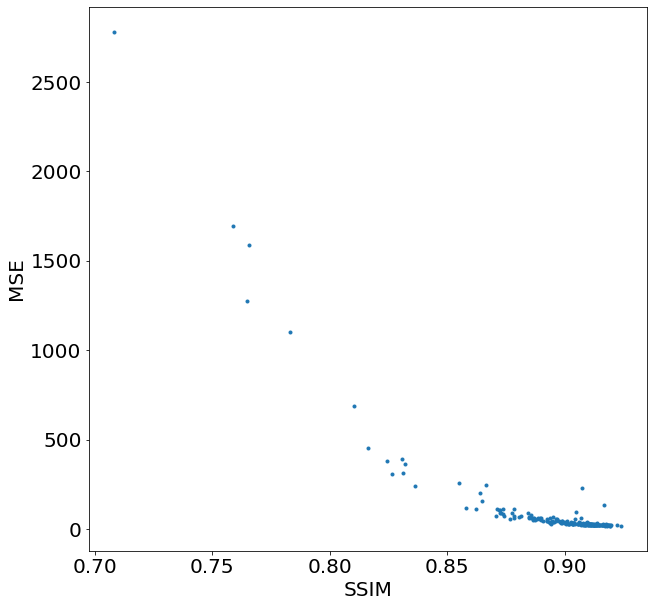

In [ ]:
#이미지 비교 metric MSE와 SSIM상관관계 그려보기(MSE는 로그스케일로 그려보기)
plt.figure(figsize=(10,10))
plt.plot(ssim_arr, mse_arr, '.')
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

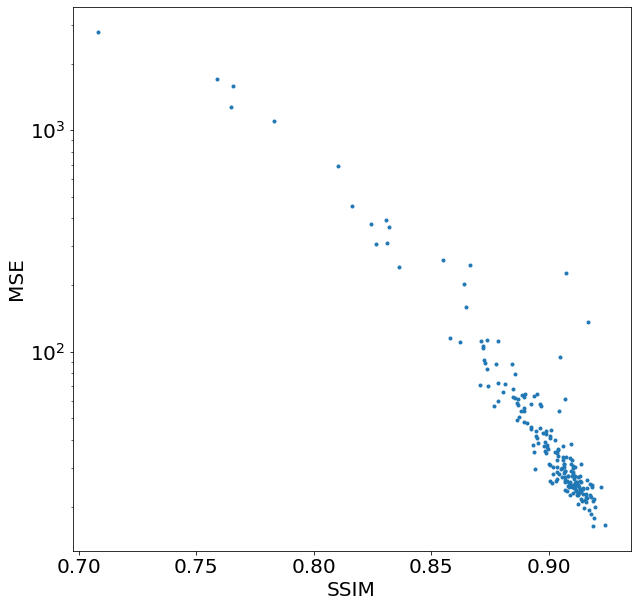

In [ ]:
#이미지 비교 metric MSE와 SSIM상관관계 그려보기(MSE는 로그스케일로 그려보기)
plt.figure(figsize=(10,10))
plt.plot(ssim_arr, mse_arr, '.')
plt.xlabel('SSIM', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yscale("log")
plt.show()

In [ ]:
#MSE가 1000보다 큰 것에 대한 이미지 리스트 찾기
mse_arr_np=np.asarray(mse_arr)
mse_over_1000_list=list(np.where(mse_arr_np > 1000))[0]
print(mse_over_1000_list)

[ 55  61  63 101 116]


In [ ]:
#MSE가 20보다 작은 것에 대한 이미지 리스트 찾기
mse_under_20_list=list(np.where(mse_arr_np < 20))[0]
print(mse_under_20_list)

[ 34  65  72  81 122 137 190]


In [ ]:
#MSE가 20보다 작은 것에 대한 이미지 그려서, noise 감소 품질을 visual examination해보기
for tmp in range(len(mse_under_20_list)):
    
    img_real=cv2.imread(real_images[mse_under_20_list[tmp]], 0)
    img_syn=cv2.imread(real_images[mse_under_20_list[tmp]].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[mse_under_20_list[tmp]].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    plt.figure(figsize=(20,10))
    plt.subplot(141)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(142)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(143)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.subplot(144)
    plt.title('input - denoised image', fontsize=15)
    plt.imshow(img_real_clean_pair.astype('float32')- img_syn.astype('float32'), cmap='gray')
    plt.show()

In [ ]:
#MSE가 1000보다 큰 것에 대한 이미지 그려서, 왜 큰 차이가 나는지 visual examination해보기
for tmp in range(len(mse_over_1000_list)):
    
    img_real=cv2.imread(real_images[mse_over_1000_list[tmp]], 0)
    img_syn=cv2.imread(real_images[mse_over_1000_list[tmp]].replace('real', 'fake'), 0)
    
    img_real_clean_pair=cv2.imread(os.path.join('handson_cyclegan/promedius_cxr_for_cyclegan/testB', real_images[mse_over_1000_list[tmp]].replace('_real', '').split('/')[-1]), 0)
    
    mse_v, ssim_v = compare_images(img_real_clean_pair, img_syn)
    
    print('MSE of paired image', round(mse_v, 2))
    print('SSIM of paired image', round((ssim_v*100.), 2))
    
    plt.figure(figsize=(20,10))
    plt.subplot(141)
    plt.title('input noisy image', fontsize=15)
    plt.imshow(img_real, cmap='gray')
    plt.subplot(142)
    plt.title('denoised image', fontsize=15)
    plt.imshow(img_syn, cmap='gray')
    plt.subplot(143)
    plt.title('input clean image', fontsize=15)
    plt.imshow(img_real_clean_pair, cmap='gray')
    plt.subplot(144)
    plt.title('input - denoised image', fontsize=15)
    plt.imshow(img_real_clean_pair.astype('float32')- img_syn.astype('float32'), cmap='gray')
    plt.show()